# LSTM: Long-Short Term Memory
LSTM is a specific class of RNNs.

Let's first describe some problems of the RNNs, which lead to the introduction of LSTM.

## PROBLEMS OF RNNs
Let's see the problems of RNNs which lead to the introduction of LSTM.

### Intuition
We have seen the general structure of a RNN. 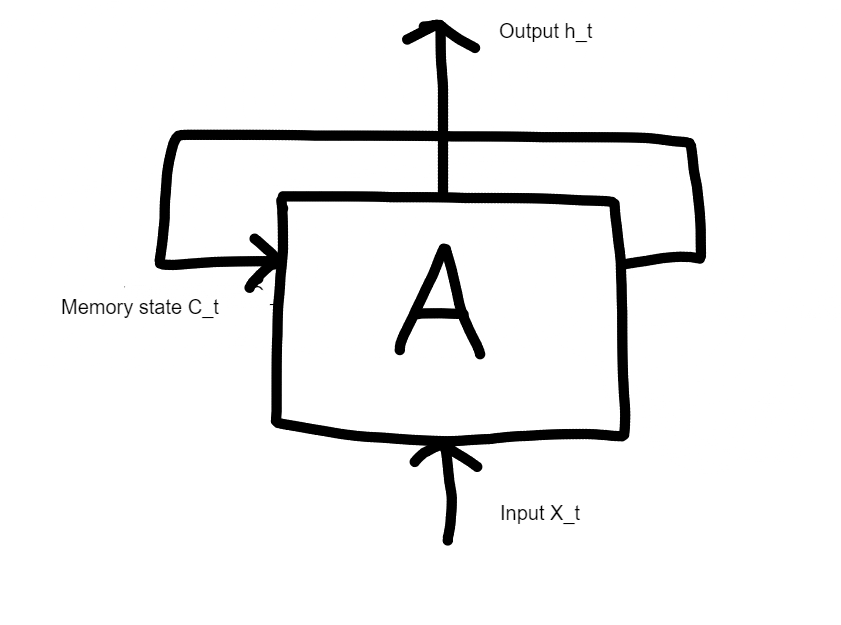
The problem is that, at each time step $t$, the memory state $C_t$ is the output $h_t$. The memory state is equal to the previous output. 

This means that, at each time step, we completely change the current state. It is difficult to preserve something over time. We would like to preserve some memory, as much as we need. We want to let the NN the ability to learn how and when update the memory.

For solving this, LSTM has been introduced.

### Formalization: vanishing gradient problem
If we compute the gradient of the loss function $l$ with respect to a weight $w$, considering $N$ total time steps, we get the formula $\Bigl(\frac{∂ℓ}{∂w}\Bigr)^N$.

This because the weigth $w$ is present exactly $N$ times in our NN (the weigths are shared in the different time steps, temporal unfolding).

Therefore, for high $N$ (which is typical), we have:
- If $\Bigl(\frac{∂ℓ}{∂w}\Bigr) < 1$, we get that $\Bigl(\frac{∂ℓ}{∂w}\Bigr)^N$ goes to $0$. Vanishing gradients: the NN does not learn/update the weigths.
- If $\Bigl(\frac{∂ℓ}{∂w}\Bigr) > 1$, we get that $\Bigl(\frac{∂ℓ}{∂w}\Bigr)^N$ goes to infinity. Exploding gradients.

This is very bad. Basically, we can't train the NN. If $N$: we can't train the RNN.

For solving this: LSTM.

## LSTM
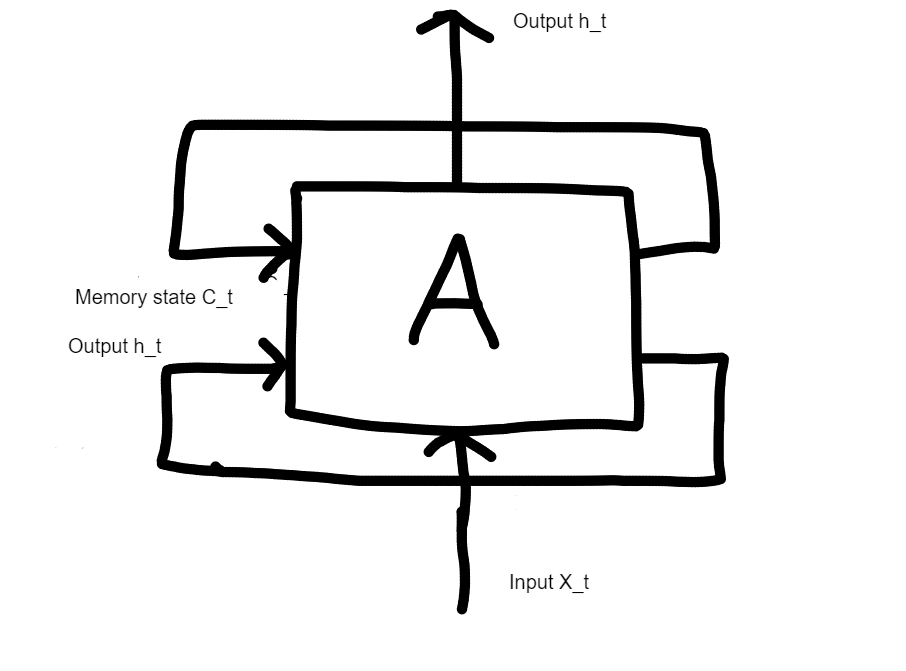

Module $A$. Time step $t$.
- Input values:
    * input at time $t$, $X_t$
    * current memory $C_{t-1}$
    * output of the previous step $h_{t-1}$
- Output values:
    * output at time $t$, $h_t$
    * new memory $C_t$.

### Temporal unfolding point of view
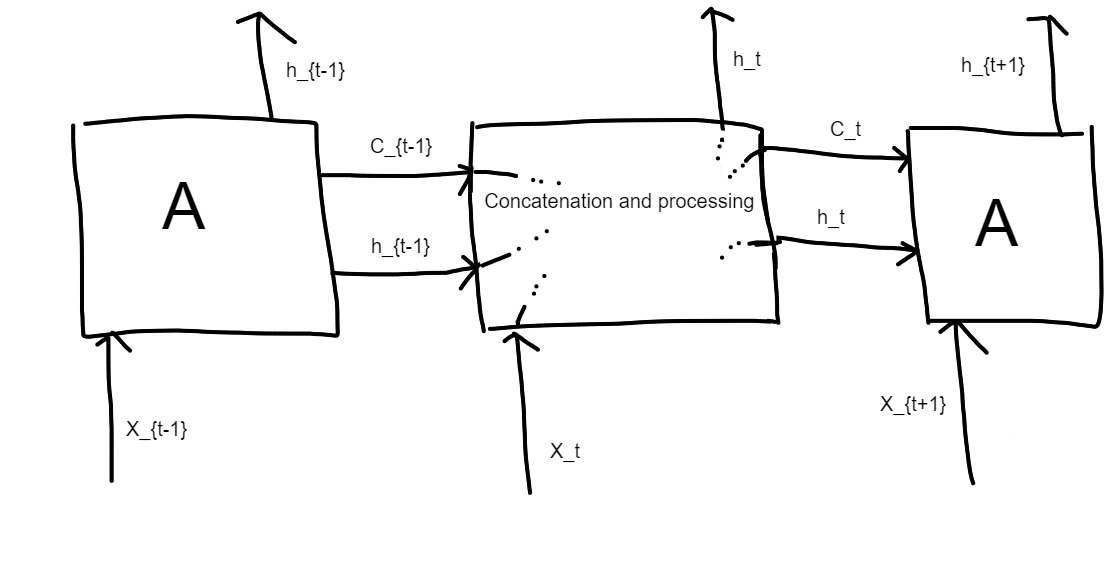
We are the time step $t$. Module $A$: it take the input $X_t$, the current memory state $C_{t-1}$ and the previous output $h_{t-1}$. It combines and process them, for generating the output $h_t$ and the next memory state $C_t$.

### Difference with simple RNN
Basically, the difference with simple RNN, is that in the LSTM we separate the output produced at time $t$ with the memory produced at time $t$. We separate $h_t$ and $C_t$: they are not necessarily equal.

Therefore, at the next step $t+1$, we pass both the output $h_t$ and the memory $C_t$.

### Module $A$
The module is implemented in a more sophisticated way with respect to simple RNN. 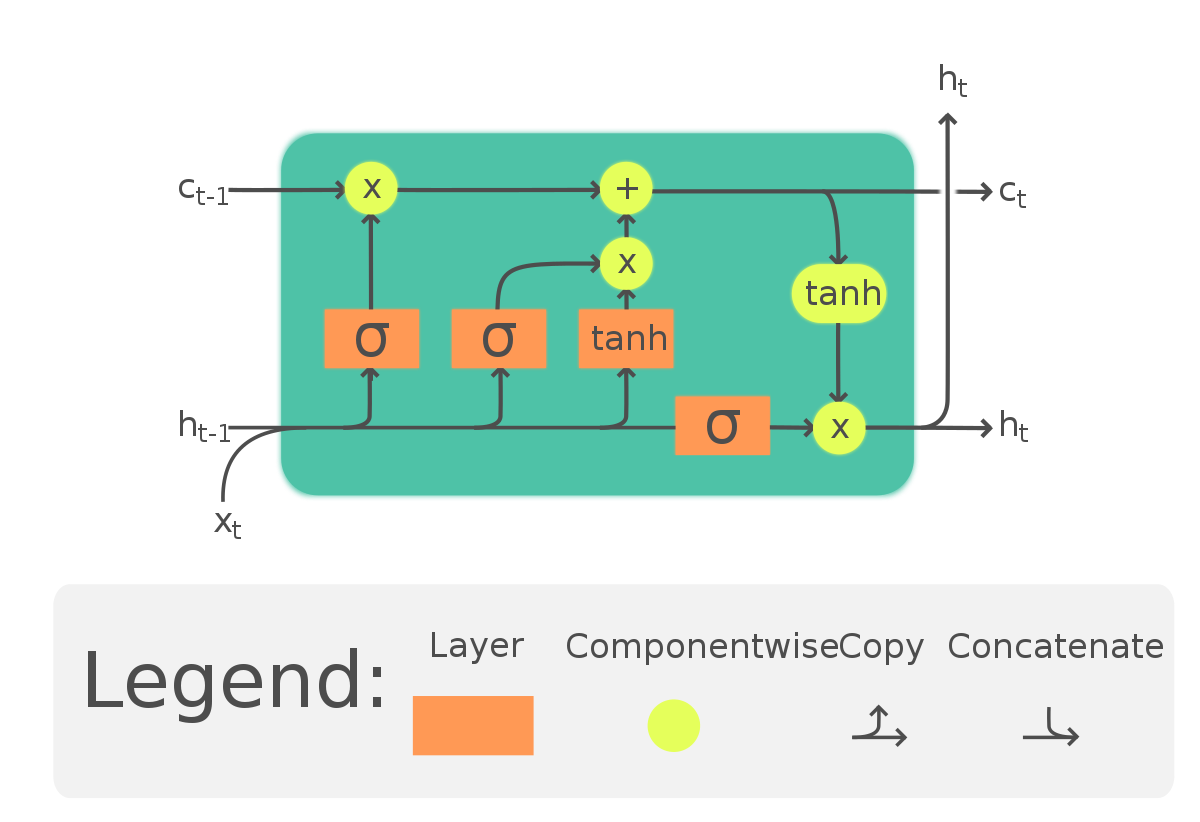 The implementation is based on **gates**, which allow the NN to learn what to keep and what to forget about the current memory.

## LSTM : SUM UP

### Definition
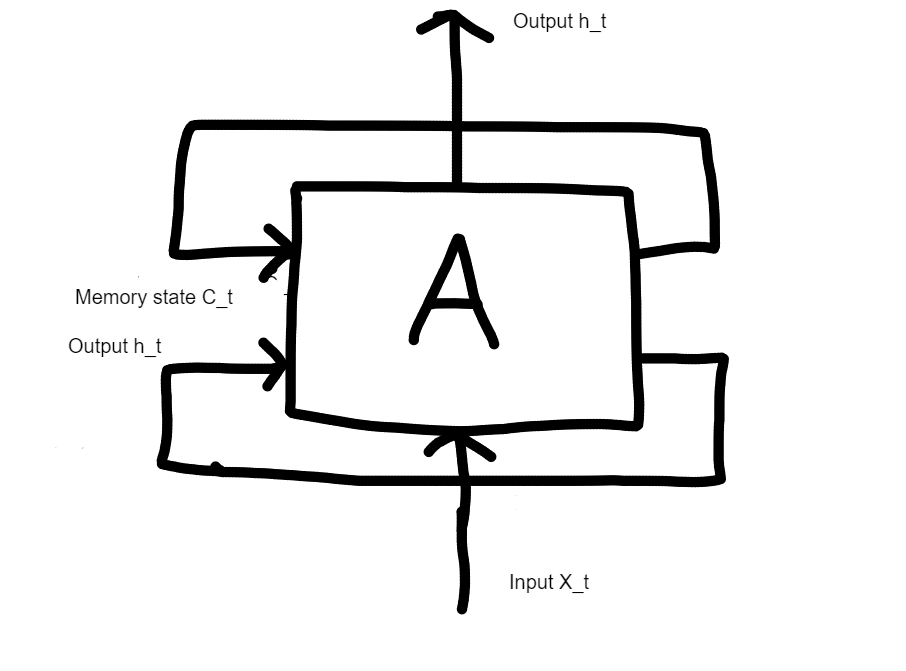
Time step $t$: input $X_t$, memory state $C_t$, output $h_t$.

We have $N$ time steps. Therefore, we have:
- An input sequence of length $N$: $X_1, X_2, ..., X_N$. Each input has the same dimension.
- An output sequence of length $N$: $h_1, h_2, ..., h_N$. Each output has the same dimension.

We have also a sequence of $N$ memory states $C_1, ..., C_N$. Each memory state has the same dimension.

Basically, we are doing a processing of a sequence of $N$ elements: $X_1, X_2, ..., X_N$ $\implies$ $h_1, h_2, ..., h_N$.

We can also have a single input (the first one $X_1$) or a single output (the last one $h_N$).

### Temporal unfolding point of view
This is the most typical way of seeing and implementing a RNN.

It is a completely Feed-Forward NN, with shared weigths.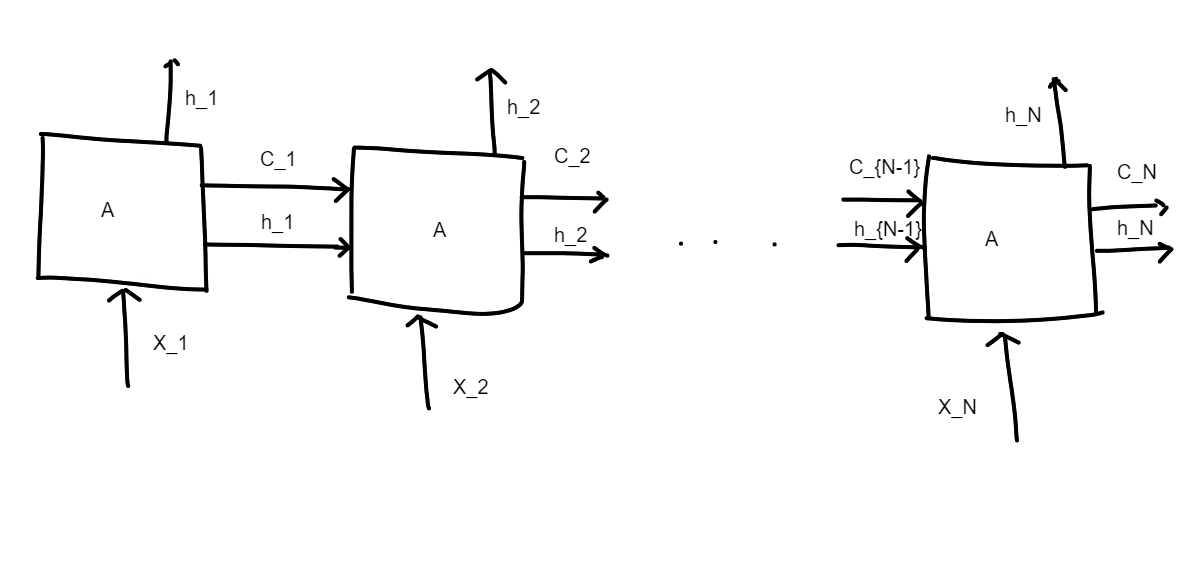
- Input sequence of length $N$: $X_1, X_2, ..., X_N$. Each input has the same dimension.
- Output sequence of length $N$: $h_1, h_2, ..., h_N$. Each output has the same dimension.
- Sequence of $N$ memory states $C_1, ..., C_N$. Each memory state has the same dimension.

Basically, we are doing a processing of a sequence of $N$ elements: $X_1, X_2, ..., X_N$ $\implies$ $h_1, h_2, ..., h_N$.

We can also have a single input (the first one $X_1$) or a single output (the last one $h_N$).

### Black-box point of view

Basically, a LSTM can be seen as a single block. Single black-box, whose aim is to process a sequence of length $N$. **Black-box module for sequence processing.** 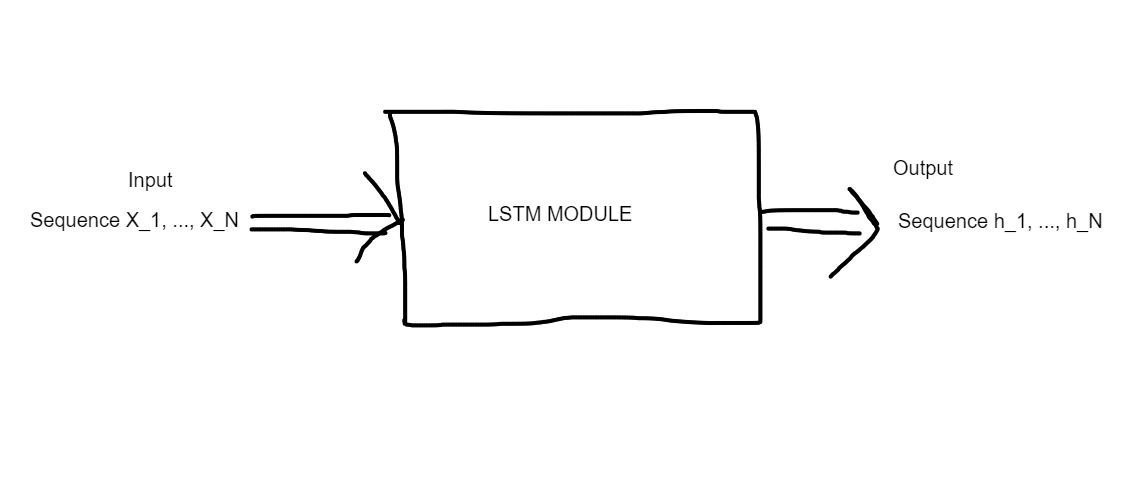

Each input has the same dimension. Each output has the same dimension.

We can also have a single input (the first one $X_1$) or a single output (the last one $h_N$).

Of course, when using a LSTM module, we have to keep in mind that this processing is done in a recurrent way: the processing is done step after step.
- The input is processed step after step. One input at a time, in sequence.
- At the same time, the output is generated step after step. One output at a time, in sequence.

This implies that the generation of the output can't be paralellized.

### Insight about the dimensions of the input, about the dimensions of the output, about the dimensions of the memory states

Each input $X_t$ has the same dimensions. It can be a flat vector (e.g. token in a text), or it can be a structured input (e.g. image in a video).

Each output $h_t$ has the same dimensions. It can be a flat vector (e.g. token in a text), or it can be a structured tensor (e.g. image in a video).

Each memory state $C_t$ has the same dimensions. It can be a flat vector, or it can be a structured tensor. 

## LSTM IN KERAS

LSTM is implemented in keras as a layer: `LSTM` layer. Documentation: https://keras.io/api/layers/recurrent_layers/lstm/

LSTM has the same interface introduced for simple RNN.

Guide to RNNs in general in TensorFlow/Keras: https://www.tensorflow.org/guide/keras/rnn, https://keras.io/guides/working_with_rnns/.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM

### Input

The imput of the RNN layer has the following three dimensions: $B, N, I$.
- $B$ is the batch size, i.e. the number of samples. Each sample is a sequence. Each sample is an input sequence.
- $N$: number of elements in each sequence. Each input sequence has the structure $X_1, ..., X_N$.
- $I$: dimension of each input element $X_t$. So, each input element $X_t$ is a flat vector, with $I$ values.

Basically, $N$ is the number of time steps in the LSTM. Which is the number of modules in the temporal unfolding.

In [2]:
# Defining an input with 32 samples, where each sample is a sequence of 10 elements X_t, where each element X_t is a vector 
# of lengths 8
inputs = tf.random.normal([32, 10, 8])

### Layer
In defining the LSTM layer, we have to define `units`, which is the dimension $O$ of each output $h_t$. So, each output element $h_t$ is a flat vector, with $O$ values.

Basically, `units` is the number of neurons in each output $h_t$.

This is also the dimension of each memory state $C_t$.

In [4]:
final_outputs = LSTM(units=4)(inputs)

### Output

By default, the LSTM layer returns, for each input sequence $X_1, ..., X_N$, only the last output $h_N$. So, by default, the LSTM layer returns, for each input sequence, only one output, the last one.

This means that the output has dimensions $BxO$, where $B$ is the number of samples and $O$ is the dimension of the last output $h_N$.

In our case, the output has shape $32x4$.

In [5]:
last_outputs.shape

TensorShape([32, 4])

### Return the full output sequence

We can specify to the LSTM layer to return the full output sequence $h_1, ..., h_N$, and not only the last output $h_N$. This is specified through the `return_sequences` argument.

In [6]:
last_outputs = LSTM(units=4, return_sequences=True)(inputs)

In this way, for each input sequence $X_1, ..., X_N$, the LSTM layer returns an output sequence of the same length: $h_1, ..., h_N$.

So, the dimensions of the output are $BxNxO$, where $B$.

In our example: $32x10x4$.

In [7]:
whole_outputs.shape

TensorShape([32, 10, 4])

### Return also the memory states

We can specify to the LSTM layer to return also the memory state, only the last one: $C_N$. This, for simple LSTM, is equal to $h_N$.

**THIS IS THE ONLY DIFFERENCE WITH THE INTERFACE OF `SimpleRNN`**.

In [10]:
whole_outputs, last_outputs, last_memory_states = LSTM(units=4, return_sequences=True, return_state=True)(inputs)

In [13]:
# For each sample, full sequence of outputs h_1, ..., h_N
whole_outputs.shape

TensorShape([32, 10, 4])

In [11]:
# For each sample, last output h_N
last_outputs.shape

TensorShape([32, 4])

In [14]:
# For each sample, last memory state C_N
last_memory_states.shape

TensorShape([32, 4])